#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
import requests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

Download CSV Dataset from Google Drive

Drive Link: https://drive.google.com/file/d/1y8JuGq0Vs-T_snaxT61GOEgmaDOU3laq/view?usp=sharing

Source: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data

In [2]:
!gdown --id 1y8JuGq0Vs-T_snaxT61GOEgmaDOU3laq

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y8JuGq0Vs-T_snaxT61GOEgmaDOU3laq
To: /content/corporate_rating.csv
100% 1.64M/1.64M [00:00<00:00, 55.0MB/s]


# Importing the Dataset


In [3]:
# Read the CSV file
df = pd.read_csv('/content/corporate_rating.csv')

# Explore the data
df.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


# Get All Column Names

In [4]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

# Removing unncessary Columns

In [5]:
df = df.drop(columns=["Rating Agency", "Corporation", 'SIC Code', 'Sector',"Rating Date", "CIK",'Binary Rating', "Ticker"], axis=1)
df.head()

,Rating,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,A-,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,AAA,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,BBB-,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,AA-,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,A,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [6]:
rating_dict = {
    'AAA': 'Lowest Risk',
    'AA+': 'Low Risk',
    'AA': 'Low Risk',
    'AA-': 'Low Risk',
    'A+': 'Low Risk',
    'A': 'Low Risk',
    'A-': 'Low Risk',
    'BBB+': 'Medium Risk',
    'BBB': 'Medium Risk',
    'BBB-': 'Medium Risk',
    'BB+': 'High Risk',
    'BB': 'High Risk',
    'BB-': 'High Risk',
    'B+': 'High Risk',
    'B': 'High Risk',
    'B-': 'High Risk',
    'CCC+': 'Highest Risk',
    'CCC': 'Highest Risk',
    'CCC-': 'Highest Risk',
    'CC': 'Highest Risk',
    'C': 'Highest Risk',
    'D': 'In Default'
}

df['Rating'] = df['Rating'].map(rating_dict)


# Visualizing the Dataset

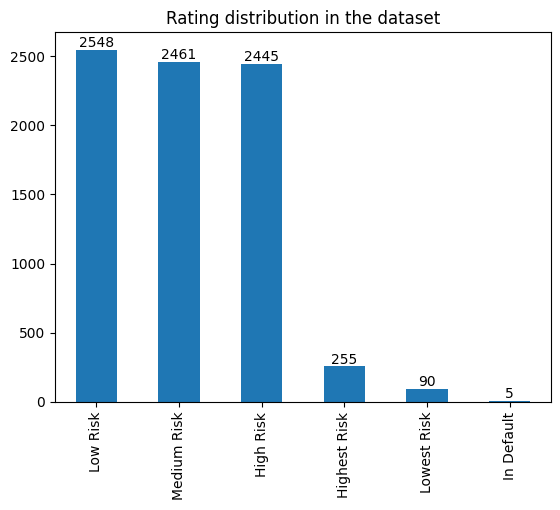

In [7]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Count the occurrences of each unique value in the 'Rating' column
rating_counts = df['Rating'].value_counts()

# Create a bar plot
ax = rating_counts.plot(kind='bar', title='Rating distribution in the dataset')

# Add annotations on top of each bar with the sample count
for i, v in enumerate(rating_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


# Dropping "In Default" Data due to Low Sample Count

In [8]:
# df = df[df['Rating']!='Lowest Risk'] # filter Lowest Risk
df = df[df['Rating']!='In Default']  # filter In Default
df.reset_index(inplace = True, drop=True) # reset index

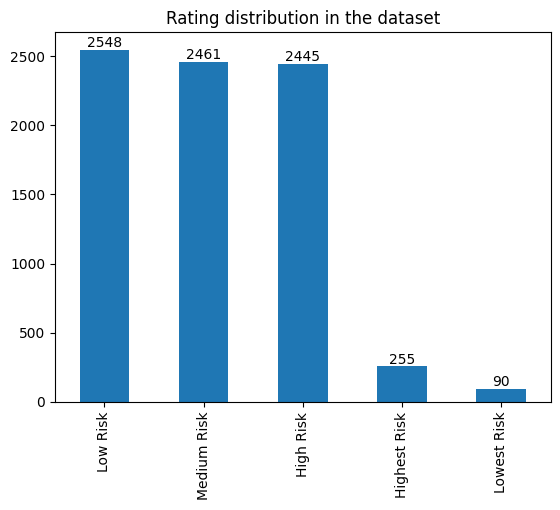

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Count the occurrences of each unique value in the 'Rating' column
rating_counts = df['Rating'].value_counts()

# Create a bar plot
ax = rating_counts.plot(kind='bar', title='Rating distribution in the dataset')

# Add annotations on top of each bar with the sample count
for i, v in enumerate(rating_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


# Splitting the Dataset into Labeled and Unlabeled Data

In [10]:
labeled_data, unlabeled_data= train_test_split(df, test_size=0.85, random_state=42)

In [11]:
print(f"Labeled Dataset Size: {len(labeled_data.index)}")
print(f"Unlabeled Dataset Size: {len(unlabeled_data.index)}")

Labeled Dataset Size: 1170
Unlabeled Dataset Size: 6630


# Training on Full Labeled Data

In [12]:
X_view_full_labeled_dataset = labeled_data.iloc[:,1:]
Y_view_full_labeled_dataset = labeled_data.iloc[:,0]

In [13]:
# Encoding the Dependent Variable
labelencoder_y_full_labeled = LabelEncoder()
Y_view_full_labeled_dataset = labelencoder_y_full_labeled.fit_transform(Y_view_full_labeled_dataset)

In [14]:
X_view_full_labeled_train, X_view_full_labeled_test, y_view_full_labeled_train, y_full_view_labeled_test = train_test_split(X_view_full_labeled_dataset, Y_view_full_labeled_dataset, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X_full_labeled = StandardScaler()
X_view_full_labeled_train = sc_X_full_labeled.fit_transform(X_view_full_labeled_train)
X_view_full_labeled_test = sc_X_full_labeled.transform(X_view_full_labeled_test)

In [16]:
from sklearn.decomposition import PCA

n_components_full_labeled = 16  # Adjust the number of components as needed
pca_full_labeled = PCA(n_components=n_components_full_labeled)
X_view_full_labeled_train = pca_full_labeled.fit_transform(X_view_full_labeled_train)
X_view_full_labeled_test = pca_full_labeled.transform(X_view_full_labeled_test)

# Model Training Code

In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote_full_labeled = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_view_full_labeled_resampled, y_view_full_labeled_resampled = smote_full_labeled.fit_resample(X_view_full_labeled_train, y_view_full_labeled_train)

# Set a seed for reproducibility
np.random.seed(42)

print("------------KNN---------------")
knn_classifier_full_labeled = KNeighborsClassifier(n_neighbors=5)

# Fit the model without hyperparameter tuning
knn_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_knn = knn_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_KNN_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_knn)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_knn, zero_division=0))

print(f"------------Decision Tree---------------")
DT_classifier_full_labeled = DecisionTreeClassifier(criterion='gini', max_depth=None)

# Fit the model without hyperparameter tuning
DT_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_dt = DT_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_DT_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_dt)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_dt, zero_division=0))

print(f"------------Naive Bayes---------------")
NB_classifier_full_labeled = GaussianNB()

# Fit the model without hyperparameter tuning
NB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_nb = NB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_NB_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_nb)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_nb, zero_division=0))

print(f"------------Random Forest---------------")
RF_classifier_full_labeled = RandomForestClassifier(n_estimators=100, criterion='gini')

# Fit the model without hyperparameter tuning
RF_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_rf = RF_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_RF_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_rf)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_rf, zero_division=0))

print(f"------------SVC---------------")
SVC_classifier_full_labeled = SVC(C=1, kernel='rbf')

# Fit the model without hyperparameter tuning
SVC_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_svc = SVC_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_SVC_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_svc)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_svc, zero_division=0))

print(f"------------XG Boost---------------")
XGB_classifier_full_labeled = XGBClassifier(n_estimators=150, learning_rate=0.1)

# Fit the model without hyperparameter tuning
XGB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_xgb = XGB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Evaluate the performance of the classifier
Accuracy_XGB_full_labeled = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_xgb)
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_xgb, zero_division=0))


------------KNN---------------
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        80
           1       0.28      1.00      0.43         5
           2       0.64      0.61      0.62        89
           3       0.00      0.00      0.00         4
           4       0.34      0.36      0.35        56

    accuracy                           0.54       234
   macro avg       0.39      0.51      0.41       234
weighted avg       0.56      0.54      0.55       234

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        80
           1       0.57      0.80      0.67         5
           2       0.63      0.57      0.60        89
           3       0.00      0.00      0.00         4
           4       0.42      0.52      0.46        56

    accuracy                           0.60       234
   macro avg       0.47      0.52      0.49       234
weigh

In [24]:
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list_full_labeled})

<ipython-input-25-09ae925b18a9>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


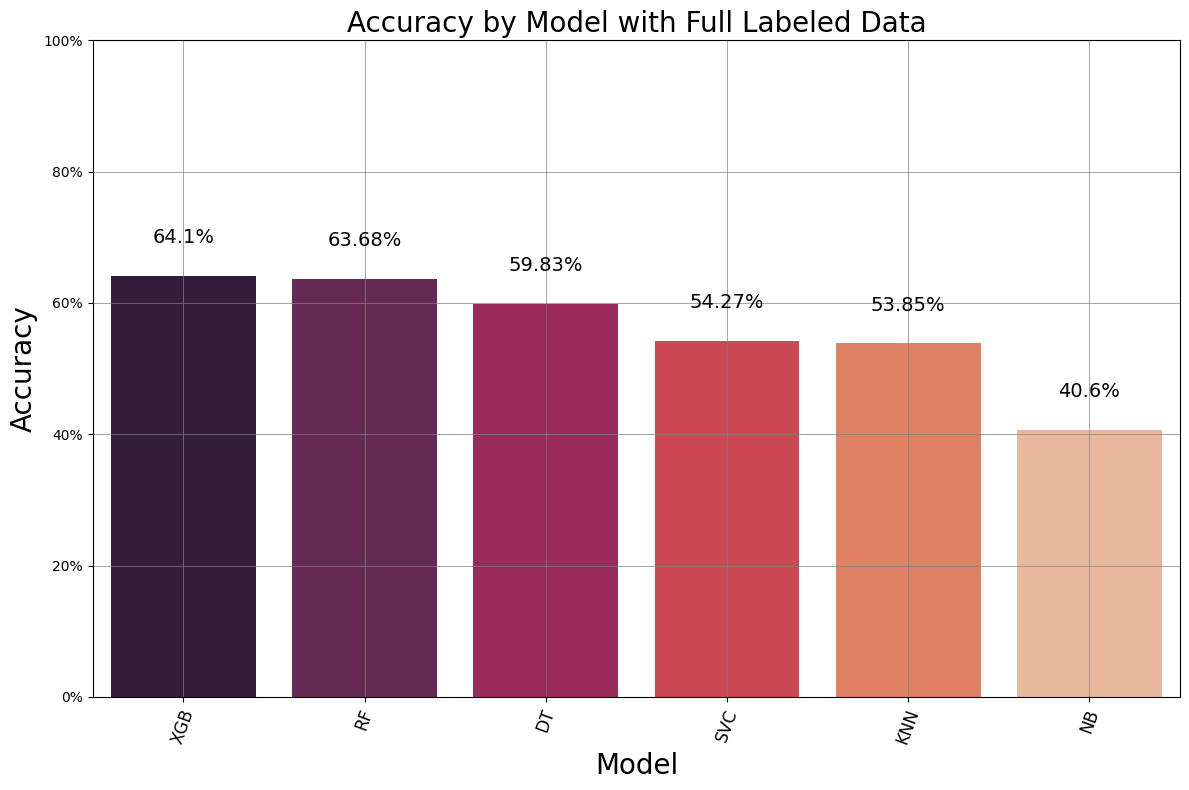

In [25]:
import matplotlib.ticker as mtick

order = list(df_accuracy_full_labeled.sort_values('Accuracy', ascending=False).Model)
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy_full_labeled, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with Full Labeled Data", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy_full_labeled.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy_full_labeled.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Hyperparameter Tuning

In [43]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

smote_full_labeled = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view_full_labeled_resampled, y_view_full_labeled_resampled = smote_full_labeled.fit_resample(X_view_full_labeled_train, y_view_full_labeled_train)

# Set a seed for reproducibility
np.random.seed(42)

print("------------KNN---------------")
knn_classifier_full_labeled = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9]}

# Perform Grid Search
grid_search_knn = GridSearchCV(knn_classifier_full_labeled, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", best_params_knn)

# Make predictions on the test set with the best model
y_full_labeled_pred_knn_grid = grid_search_knn.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_KNN_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_knn_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_knn_grid, zero_division=0))

print(f"------------Decision Tree---------------")
DT_classifier_full_labeled = DecisionTreeClassifier()

# Define the parameter grid for Decision Tree
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 10, 15, 20]}

# Perform Grid Search
grid_search_dt = GridSearchCV(DT_classifier_full_labeled, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree:", best_params_dt)

# Make predictions on the test set with the best model
y_full_labeled_pred_dt_grid = grid_search_dt.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_DT_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_dt_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_dt_grid, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier_full_labeled = GaussianNB()
NB_classifier_full_labeled.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Make predictions on the test set
y_full_labeled_pred_nb = NB_classifier_full_labeled.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_NB_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_nb)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_nb, zero_division=0))


print(f"------------Random Forest---------------")
RF_classifier_full_labeled = RandomForestClassifier()

# Define the parameter grid for Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100, 200],
                 'criterion': ['gini', 'entropy']}

# Perform Grid Search
grid_search_rf = GridSearchCV(RF_classifier_full_labeled, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Make predictions on the test set with the best model
y_full_labeled_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_RF_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_rf_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_rf_grid, zero_division=0))

print(f"------------SVC---------------")
SVC_classifier_full_labeled = SVC()

# Define the parameter grid for Support Vector Classifier
param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Perform Grid Search
grid_search_svc = GridSearchCV(SVC_classifier_full_labeled, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for SVC:", best_params_svc)

# Make predictions on the test set with the best model
y_full_labeled_pred_svc_grid = grid_search_svc.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_SVC_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_svc_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_svc_grid, zero_division=0))

print(f"------------XG Boost---------------")
XGB_classifier_full_labeled = XGBClassifier()

# Define the parameter grid for XG Boost
param_grid_xgb = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 0.2]}

# Perform Grid Search
grid_search_xgb = GridSearchCV(XGB_classifier_full_labeled, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_view_full_labeled_resampled, y_view_full_labeled_resampled)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for XG Boost:", best_params_xgb)

# Make predictions on the test set with the best model
y_full_labeled_pred_xgb_grid = grid_search_xgb.best_estimator_.predict(X_view_full_labeled_test)

# Accuracy Store
Accuracy_XGB_full_labeled_tuned = metrics.accuracy_score(y_full_view_labeled_test, y_full_labeled_pred_xgb_grid)

# Evaluate the performance of the classifier
print(classification_report(y_full_view_labeled_test, y_full_labeled_pred_xgb_grid, zero_division=0))

------------KNN---------------
Best Hyperparameters for KNN: {'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.80      0.61      0.70        80
           1       0.44      0.80      0.57         5
           2       0.71      0.64      0.67        89
           3       0.00      0.00      0.00         4
           4       0.41      0.61      0.49        56

    accuracy                           0.62       234
   macro avg       0.47      0.53      0.49       234
weighted avg       0.65      0.62      0.62       234

------------Decision Tree---------------
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None}
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        80
           1       0.67      0.80      0.73         5
           2       0.64      0.55      0.59        89
           3       0.00      0.00      0.00         4
           4       0.42      0.55     

In [34]:
accuracy_list_full_labeled_tuned = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled_tuned = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list_full_labeled_tuned})

<ipython-input-35-ec0f8634f698>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


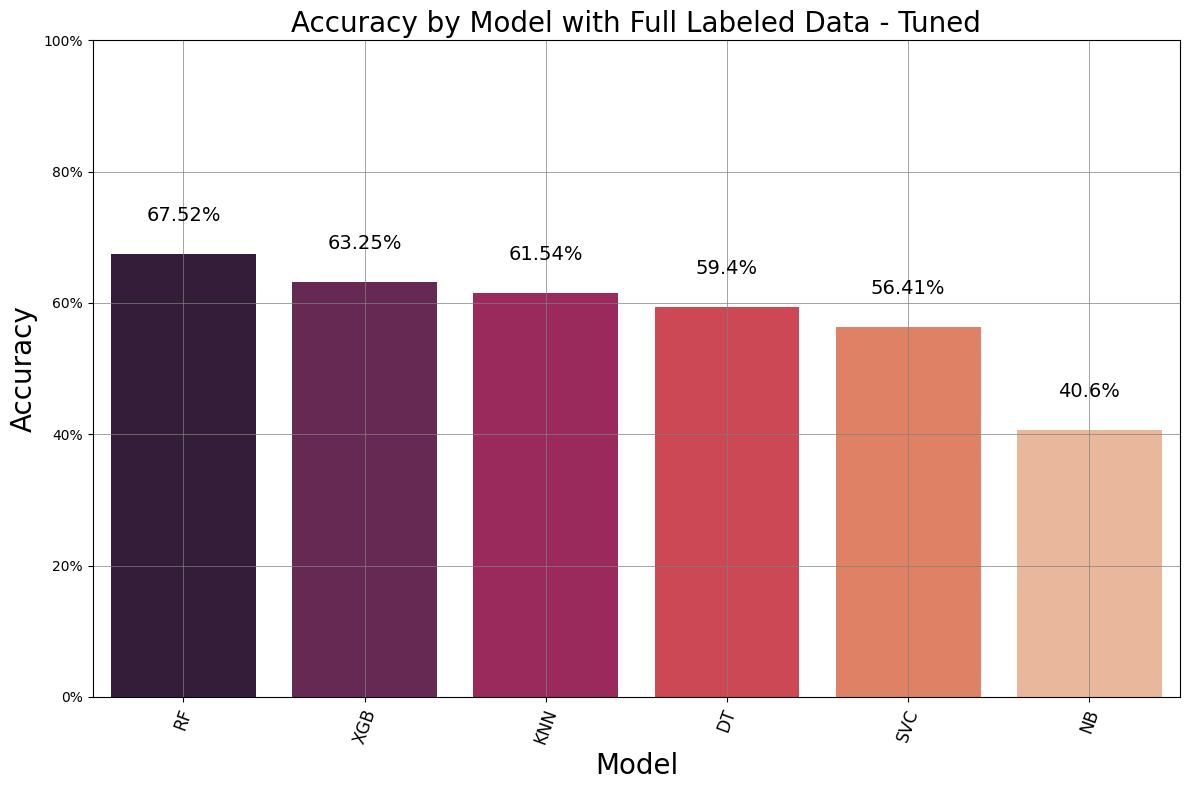

In [35]:
import matplotlib.ticker as mtick

order = list(df_accuracy_full_labeled_tuned.sort_values('Accuracy', ascending=False).Model)
df_accuracy_full_labeled_tuned = df_accuracy_full_labeled_tuned.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy_full_labeled_tuned, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model with Full Labeled Data - Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy_full_labeled_tuned.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy_full_labeled_tuned.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Multi View Training

In [38]:
# Calculate the midpoint to split the columns into two equal parts
midpoint = len(df.columns) // 2

# Split the columns into two equal parts, excluding 'Rating' temporarily
group1 = df.iloc[:, 1:midpoint]
group2 = df.iloc[:, midpoint:]

# Convert to NumPy arrays if needed
group1_array = np.array(group1.columns)
group2_array = np.array(group2.columns)

# Add 'Rating' to both arrays
view1_column_names = np.concatenate((['Rating'], group1_array))
view2_column_names = np.concatenate((['Rating'], group2_array))

# Print the arrays
print("Group 1:", view1_column_names)
print("Group 2:", view2_column_names)


Group 1: ['Rating' 'Current Ratio' 'Long-term Debt / Capital' 'Debt/Equity Ratio'
 'Gross Margin' 'Operating Margin' 'EBIT Margin' 'EBITDA Margin']
Group 2: ['Rating' 'Pre-Tax Profit Margin' 'Net Profit Margin' 'Asset Turnover'
 'ROE - Return On Equity' 'Return On Tangible Equity'
 'ROA - Return On Assets' 'ROI - Return On Investment'
 'Operating Cash Flow Per Share' 'Free Cash Flow Per Share']


In [39]:
# Create DataFrames for each view
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

# Training model on View 1

In [ ]:
X_view1_dataset = view1_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]

In [ ]:
X_view1_dataset.head()

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin
4324,2.9141,0.4068,0.6859,69.6018,7.9834,7.9834,31.7507
1063,1.2933,0.4941,1.1750,38.1207,5.6788,5.6788,8.6108
2590,1.0175,0.2247,0.2899,57.0701,-2.1888,-2.1888,2.2211
242,3.5764,0.4320,0.7605,43.9035,1.9473,9.4791,31.3869
6794,1.4968,0.3510,0.6282,32.4153,9.0423,9.0423,15.8303


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)


In [ ]:
X_view1_train, X_view1_test, y_view1_train, y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_view1_train = sc_X.fit_transform(X_view1_train)
X_view1_test = sc_X.transform(X_view1_test)

In [ ]:
from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_view1_train = pca.fit_transform(X_view1_train)
X_view1_test = pca.transform(X_view1_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='not minority',k_neighbors=1, random_state=42)
smote = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view1_resampled, y_view1_resampled = smote.fit_resample(X_view1_train, y_view1_train)

print(f"------------KNN---------------")
from sklearn.neighbors import KNeighborsClassifier
# Train a classifier on the resampled data
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = knn_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_KNN = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------Decision Tree---------------")
from sklearn.tree import DecisionTreeClassifier
# Train a classifier on the resampled data
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = DT_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_DT = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier = GaussianNB()
NB_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = NB_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_NB = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))


print(f"------------Random Forest---------------")
from sklearn.ensemble import RandomForestClassifier
# Train a classifier on the resampled data
RF_classifier = RandomForestClassifier(n_estimators=10, random_state = 0, criterion='entropy')
RF_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = RF_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_RF = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------SVC---------------")
from sklearn.svm import SVC
# Train a classifier on the resampled data
SVC_classifier = SVC(kernel='poly', random_state=0)
SVC_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = SVC_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_SVC = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

print(f"------------XG Boost---------------")
from xgboost import XGBClassifier
# Train a classifier on the resampled data
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_view1_resampled, y_view1_resampled)

# Make predictions on the test set
y_view1_pred = XGB_classifier.predict(X_view1_test)

# Accuracy Store
Accuracy_XGB = metrics.accuracy_score(y_view1_test, y_view1_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view1_test, y_view1_pred, zero_division=0))

------------KNN---------------
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        80
           1       0.30      0.60      0.40         5
           2       0.66      0.57      0.61        89
           3       0.00      0.00      0.00         4
           4       0.41      0.54      0.46        56

    accuracy                           0.56       234
   macro avg       0.41      0.46      0.42       234
weighted avg       0.58      0.56      0.57       234

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        80
           1       0.33      0.80      0.47         5
           2       0.68      0.58      0.63        89
           3       0.00      0.00      0.00         4
           4       0.40      0.55      0.46        56

    accuracy                           0.56       234
   macro avg       0.42      0.50      0.43       234
weigh

In [ ]:
accuracy_list = [Accuracy_KNN, Accuracy_DT, Accuracy_NB, Accuracy_RF, Accuracy_SVC, Accuracy_XGB]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

<ipython-input-39-139e084f116f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


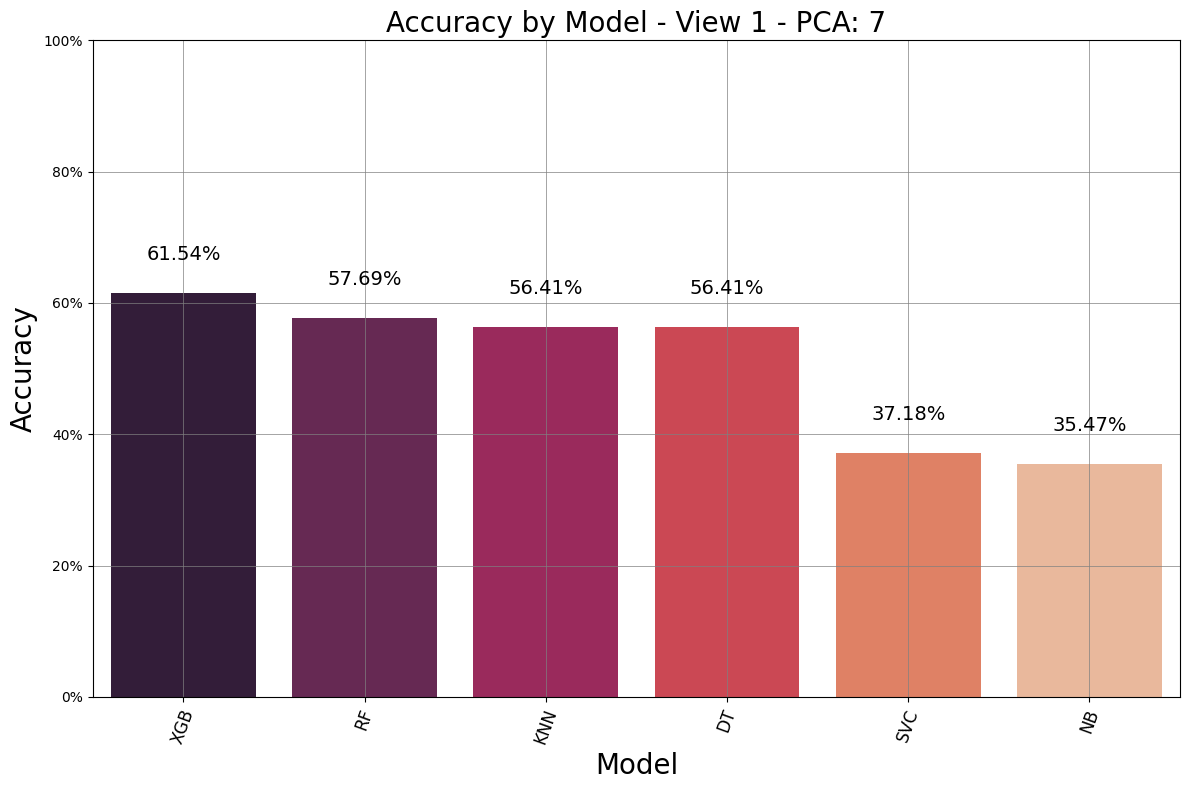

In [ ]:
import matplotlib.ticker as mtick

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model - View 1 - PCA: {n_components}", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Training model on view 2

In [ ]:
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view2_dataset = view2_dataset.iloc[:,0]

In [ ]:
X_view2_dataset.head()

,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
4324,6.7290,4.1615,1.0251,9.6384,-341.9938,4.2661,5.7171,-1.2326,-1.1943
1063,3.7829,2.2715,0.8946,10.1047,-15.8711,3.0385,5.1121,-0.0127,-0.1314
2590,-1.5464,0.0558,1.2909,0.1963,0.2631,0.0764,0.1522,0.7756,0.5743
242,1.9473,-2.4218,0.3318,2.5612,2.6450,1.2468,1.4549,282.1921,91.3671
6794,6.2131,5.7933,0.6890,9.3325,109.3396,3.9916,5.8916,-0.1739,0.1418


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Assuming X_view1_dataset is a 2D numpy array
# One-hot encode the first two columns of the independent variable
# transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
# X_view2_dataset = transformer.fit_transform(X_view2_dataset)

# # Convert the sparse matrix to a dense NumPy array
# X_view2_dataset = X_view2_dataset.toarray()

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view2_dataset = labelencoder_y.fit_transform(Y_view2_dataset)


In [ ]:
X_view2_train, X_view2_test, y_view2_train, y_view2_test = train_test_split(X_view2_dataset, Y_view2_dataset, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_view2_train = sc_X.fit_transform(X_view2_train)
X_view2_test = sc_X.transform(X_view2_test)

In [ ]:
from sklearn.decomposition import PCA

n_components = 9  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_view2_train = pca.fit_transform(X_view2_train)
X_view2_test = pca.transform(X_view2_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='not minority',k_neighbors=1, random_state=42)
smote = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view2_resampled, y_view2_resampled = smote.fit_resample(X_view2_train, y_view2_train)

print(f"------------KNN---------------")
from sklearn.neighbors import KNeighborsClassifier
# Train a classifier on the resampled data
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = knn_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_KNN = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------Decision Tree---------------")
from sklearn.tree import DecisionTreeClassifier
# Train a classifier on the resampled data
DT_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = DT_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_DT = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------Naive Bayes---------------")
from sklearn.naive_bayes import GaussianNB
# Train a classifier on the resampled data
NB_classifier = GaussianNB()
NB_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = NB_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_NB = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))


print(f"------------Random Forest---------------")
from sklearn.ensemble import RandomForestClassifier
# Train a classifier on the resampled data
RF_classifier = RandomForestClassifier(n_estimators=10, random_state = 0, criterion='entropy')
RF_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = RF_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_RF = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------SVC---------------")
from sklearn.svm import SVC
# Train a classifier on the resampled data
SVC_classifier = SVC(kernel='poly', random_state=0)
SVC_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = SVC_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_SVC = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

print(f"------------XG Boost---------------")
from xgboost import XGBClassifier
# Train a classifier on the resampled data
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_view2_resampled, y_view2_resampled)

# Make predictions on the test set
y_view2_pred = XGB_classifier.predict(X_view2_test)

# Accuracy Store
Accuracy_XGB = metrics.accuracy_score(y_view2_test, y_view2_pred)

# Evaluate the performance of the classifier
print(classification_report(y_view2_test, y_view2_pred, zero_division=0))

------------KNN---------------
              precision    recall  f1-score   support

           0       0.71      0.61      0.66        80
           1       0.27      0.60      0.37         5
           2       0.58      0.52      0.55        89
           3       1.00      0.25      0.40         4
           4       0.36      0.48      0.42        56

    accuracy                           0.54       234
   macro avg       0.59      0.49      0.48       234
weighted avg       0.57      0.54      0.55       234

------------Decision Tree---------------
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        80
           1       0.43      0.60      0.50         5
           2       0.68      0.63      0.65        89
           3       0.00      0.00      0.00         4
           4       0.43      0.54      0.48        56

    accuracy                           0.59       234
   macro avg       0.44      0.48      0.45       234
weigh

In [ ]:
accuracy_list = [Accuracy_KNN, Accuracy_DT, Accuracy_NB, Accuracy_RF, Accuracy_SVC, Accuracy_XGB]

model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

<ipython-input-51-f1a21ffa88b3>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


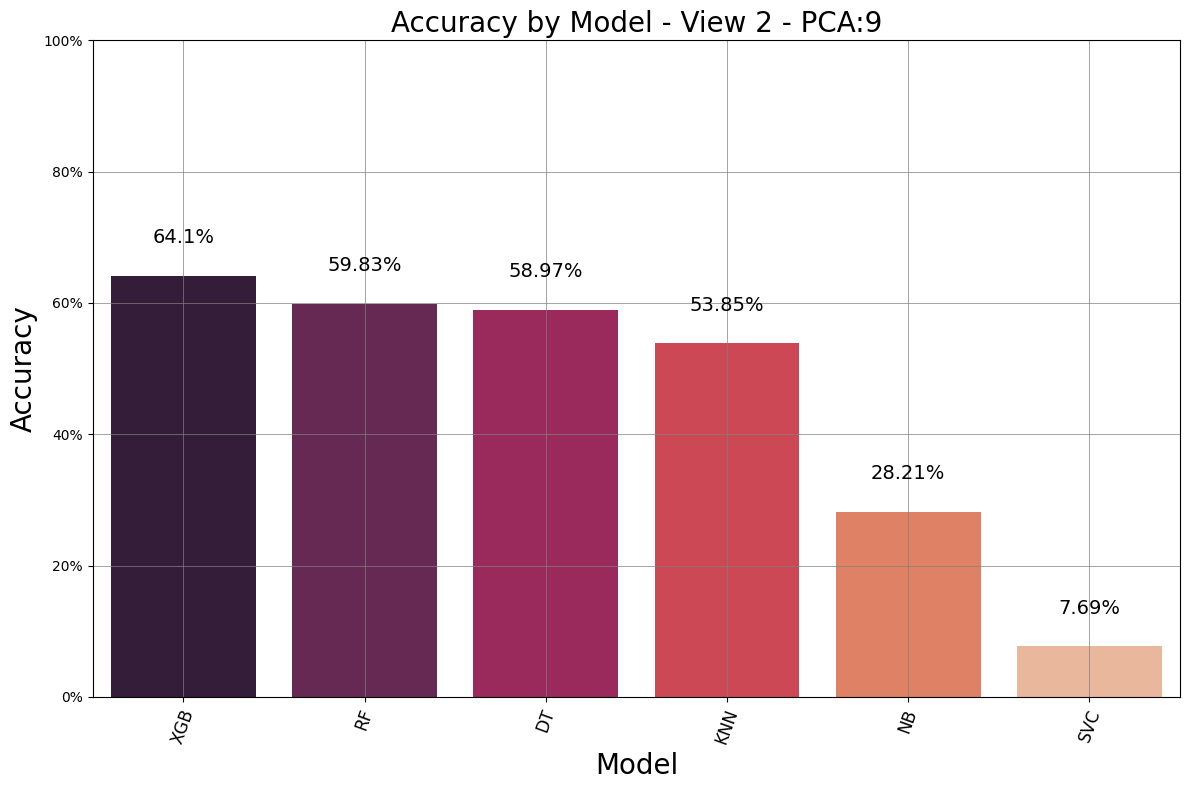

In [ ]:
import matplotlib.ticker as mtick

order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title(f"Accuracy by Model - View 2 - PCA:{n_components}", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%',
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


# Co Training with two views (XGB)

In [ ]:
# view1_dataset = labeled_data[view1_column_names]
# view2_dataset = labeled_data[view2_column_names]

# view1_dataset_unlabeled = unlabeled_data[view1_column_names]
# view2_dataset_unlabeled = unlabeled_data[view2_column_names]

# X_view1_dataset = view1_dataset.iloc[:,1:]
# X_view2_dataset = view2_dataset.iloc[:,1:]
# Y_view1_dataset = view1_dataset.iloc[:,0]


# X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
# X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
# Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# import numpy as np

# # Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
# Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.base import clone
# from imblearn.over_sampling import SMOTE

# # Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# # X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# # Split the labeled data for each view
# X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
# X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# # Initialize unlabeled data for each view
# X_view1_unlabeled = X_view1_dataset_unlabeled
# X_view2_unlabeled = X_view2_dataset_unlabeled


# from sklearn.preprocessing import StandardScaler
# sc_X1 = StandardScaler()
# X_view1_train = sc_X1.fit_transform(X_view1_train)
# X_view1_test = sc_X1.transform(X_view1_test)
# X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

# sc_X2 = StandardScaler()
# X_view2_train = sc_X2.fit_transform(X_view2_train)
# X_view2_test = sc_X2.transform(X_view2_test)
# X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


# from sklearn.decomposition import PCA

# n_components = 7  # Adjust the number of components as needed
# pca1 = PCA(n_components=n_components)
# X_view1_train = pca1.fit_transform(X_view1_train)
# X_view1_test = pca1.transform(X_view1_test)
# X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

# n_components = 9  # Adjust the number of components as needed
# pca2 = PCA(n_components=n_components)
# X_view2_train = pca2.fit_transform(X_view2_train)
# X_view2_test = pca2.transform(X_view2_test)
# X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

# smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
# X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

# smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
# X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Define the parameter grid for XGBClassifier
# param_grid_xgb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

# RF_classifier_multi_view = XGBClassifier(random_state=42)
# XGB_classifier_multi_view = XGBClassifier(random_state=42)

# # Initialize classifiers for each view
# classifier_view1 = GridSearchCV(XGB_classifier_multi_view, param_grid_xgb, cv=5, scoring='accuracy')
# classifier_view2 = GridSearchCV(RF_classifier_multi_view, param_grid_rf, cv=5, scoring='accuracy')

# # Number of iterations for co-training
# num_iterations = 100

# # Early stopping parameters
# early_stopping_rounds = 5
# evals = [(X_view1_test, Y_view1_test)]  # Validation set for early stopping

# # Adaptive confidence parameters
# initial_confidence = 0.8
# confidence_decay_factor = 0.95

# # Initialize variables for early stopping and adaptive confidence
# best_iteration = 0
# best_accuracy = 0
# confidence_threshold = initial_confidence

# # Co-training loop
# for iteration in range(num_iterations):
#     # Train classifiers
#     classifier_view1.fit(X_view1_train, Y_view1_train, eval_metric="mlogloss", eval_set=evals, early_stopping_rounds=early_stopping_rounds, verbose=False)
#     classifier_view2.fit(X_view2_train, Y_view1_train)

#     # Predict probabilities on unlabeled data using each classifier
#     probabilities_view1 = classifier_view1.best_estimator_.predict_proba(X_view1_unlabeled)
#     probabilities_view2 = classifier_view2.best_estimator_.predict_proba(X_view2_unlabeled)

#     # Use the class with the highest probability from predictions_view2
#     predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

#     # Check shapes and types
#     print("Shape of probabilities_view1:", probabilities_view1.shape)
#     print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

#     # Identify instances where the predicted class labels match and confidence is high
#     agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > confidence_threshold)

#     print(f"Iteration {iteration + 1}:")
#     # Debugging: Print additional information
#     print("Number of instances selected for co-training:", np.sum(agree_mask))
#     # Debugging: Print the distribution of predicted classes
#     print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

#     # Use the agreed-upon high-confidence predictions to update the labeled data
#     X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
#     X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
#     Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

#     # Remove the agreed-upon instances from the unlabeled data
#     X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
#     X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

#     # Evaluate the performance of the models on the test set
#     accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.best_estimator_.predict(X_view1_test))
#     accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.best_estimator_.predict(X_view2_test))

#     print(f"XGB View 1 (Test): {accuracy_view1:.4f}")
#     print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
#     print(f"Current Confidence Threshold: {confidence_threshold:.4f}")
#     print("=" * 30)

#     # Check for early stopping
#     if accuracy_view1 > best_accuracy:
#         best_accuracy = accuracy_view1
#         best_iteration = iteration
#         if accuracy_view2 > accuracy_view1:
#           MV_XGB_ACCURACY = accuracy_view2
#         else:
#           MV_XGB_ACCURACY = accuracy_view1
#     elif iteration - best_iteration >= early_stopping_rounds:
#         print(f"Early stopping at iteration {iteration + 1}")
#         break

#     # Update confidence threshold for the next iteration
#     confidence_threshold *= confidence_decay_factor

# print(f"The best accuracy is: {MV_XGB_ACCURACY}")


# Method 2 CO Training XGB

In [41]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
classifier_view2 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=100)

# Number of iterations for co-training
num_iterations = 50


# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"XGB View (Test): {accuracy_view1:.4f}")
    print(f"XGB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_XGB_ACCURACY = accuracy_view2
    else:
      MV_XGB_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_XGB_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 1890
Distribution of predicted classes for View 1: [1893  201 2269   35 2232]
XGB View (Test): 0.6239
XGB View 2 (Test): 0.6496
Shape of probabilities_view1: (4740, 5)
Shape of predicted_classes_view2: (4740,)
Iteration 2:
Number of instances selected for co-training: 682
Distribution of predicted classes for View 1: [1448   95 1622   24 1551]
XGB View (Test): 0.6282
XGB View 2 (Test): 0.6581
Shape of probabilities_view1: (4058, 5)
Shape of predicted_classes_view2: (4058,)
Iteration 3:
Number of instances selected for co-training: 488
Distribution of predicted classes for View 1: [1198   63 1554   23 1220]
XGB View (Test): 0.6624
XGB View 2 (Test): 0.6624
Shape of probabilities_view1: (3570, 5)
Shape of predicted_classes_view2: (3570,)
Iteration 4:
Number of instances selected for co-training: 244
Distribution of predicted classes for View 1: [105

# Method 2 Co Training (SVC)

In [44]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=4, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = SVC(kernel='rbf', probability=True, random_state=42, C=10)
classifier_view2 = SVC(kernel='rbf', probability=True, random_state=42, C=10)


# Number of iterations for co-training
num_iterations = 50



# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"SVC View 1 (Test): {accuracy_view1:.4f}")
    print(f"SVC View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_SVC_ACCURACY = accuracy_view2
    else:
      MV_SVC_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break



print(f"The Best Accuracy is: {MV_SVC_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 164
Distribution of predicted classes for View 1: [1401  539 2534  140 2016]
SVC View 1 (Test): 0.4829
SVC View 2 (Test): 0.4316
Shape of probabilities_view1: (6466, 5)
Shape of predicted_classes_view2: (6466,)
Iteration 2:
Number of instances selected for co-training: 78
Distribution of predicted classes for View 1: [1369  526 2555  125 1891]
SVC View 1 (Test): 0.4872
SVC View 2 (Test): 0.4274
Shape of probabilities_view1: (6388, 5)
Shape of predicted_classes_view2: (6388,)
Iteration 3:
Number of instances selected for co-training: 72
Distribution of predicted classes for View 1: [1309  537 2676  113 1753]
SVC View 1 (Test): 0.4872
SVC View 2 (Test): 0.4188
Shape of probabilities_view1: (6316, 5)
Shape of predicted_classes_view2: (6316,)
Iteration 4:
Number of instances selected for co-training: 106
Distribution of predicted classes for View 1: [

# Method 2 Co Training (RF)

In [45]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = RandomForestClassifier(n_estimators=10, random_state = 42, criterion='entropy')
classifier_view2 = RandomForestClassifier(n_estimators=10, random_state = 42, criterion='entropy')


# Number of iterations for co-training
num_iterations = 100

# Early stopping parameters
early_stopping_rounds = 20
evals = [(X_view1_test, Y_view1_test)]  # Validation set for early stopping

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"RF View 1 (Test): {accuracy_view1:.4f}")
    print(f"RF View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)

    if accuracy_view2 > accuracy_view1:
      MV_RF_ACCURACY = accuracy_view2
    else:
      MV_RF_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_RF_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 1120
Distribution of predicted classes for View 1: [2118  185 2308   43 1976]
RF View 1 (Test): 0.6239
RF View 2 (Test): 0.6709
Shape of probabilities_view1: (5510, 5)
Shape of predicted_classes_view2: (5510,)
Iteration 2:
Number of instances selected for co-training: 486
Distribution of predicted classes for View 1: [1976  107 1940   16 1471]
RF View 1 (Test): 0.6496
RF View 2 (Test): 0.6410
Shape of probabilities_view1: (5024, 5)
Shape of predicted_classes_view2: (5024,)
Iteration 3:
Number of instances selected for co-training: 369
Distribution of predicted classes for View 1: [1765   69 1831   15 1344]
RF View 1 (Test): 0.6496
RF View 2 (Test): 0.6410
Shape of probabilities_view1: (4655, 5)
Shape of predicted_classes_view2: (4655,)
Iteration 4:
Number of instances selected for co-training: 287
Distribution of predicted classes for View 1: [168

# Method 2 Co training Accuracy (KNN)

In [46]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = KNeighborsClassifier(n_neighbors=1)
classifier_view2 = KNeighborsClassifier(n_neighbors=1)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > initial_confidence)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"KNN View (Test): {accuracy_view1:.4f}")
    print(f"KNN View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_KNN_ACCURACY = accuracy_view2
    else:
      MV_KNN_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_KNN_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 3947
Distribution of predicted classes for View 1: [1980  127 2291   31 2201]
KNN View (Test): 0.5769
KNN View 2 (Test): 0.5556
Shape of probabilities_view1: (2683, 5)
Shape of predicted_classes_view2: (2683,)
Iteration 2:
Number of instances selected for co-training: 617
Distribution of predicted classes for View 1: [797  52 843  15 976]
KNN View (Test): 0.5897
KNN View 2 (Test): 0.5769
Shape of probabilities_view1: (2066, 5)
Shape of predicted_classes_view2: (2066,)
Iteration 3:
Number of instances selected for co-training: 181
Distribution of predicted classes for View 1: [601  39 625  15 786]
KNN View (Test): 0.5812
KNN View 2 (Test): 0.5897
Shape of probabilities_view1: (1885, 5)
Shape of predicted_classes_view2: (1885,)
Iteration 4:
Number of instances selected for co-training: 59
Distribution of predicted classes for View 1: [571  43 559  1

# Method 2 Co Training (DT)

In [47]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_view2 = DecisionTreeClassifier(criterion='entropy', random_state=0)


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.8)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"DT View (Test): {accuracy_view1:.4f}")
    print(f"DT View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_DT_ACCURACY = accuracy_view2
    else:
      MV_DT_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_DT_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 3606
Distribution of predicted classes for View 1: [2140  126 2394   20 1950]
DT View (Test): 0.5897
DT View 2 (Test): 0.5513
Shape of probabilities_view1: (3024, 5)
Shape of predicted_classes_view2: (3024,)
Iteration 2:
Number of instances selected for co-training: 1037
Distribution of predicted classes for View 1: [1140   55 1016   14  799]
DT View (Test): 0.5983
DT View 2 (Test): 0.6154
Shape of probabilities_view1: (1987, 5)
Shape of predicted_classes_view2: (1987,)
Iteration 3:
Number of instances selected for co-training: 498
Distribution of predicted classes for View 1: [715  35 641  14 582]
DT View (Test): 0.6239
DT View 2 (Test): 0.6111
Shape of probabilities_view1: (1489, 5)
Shape of predicted_classes_view2: (1489,)
Iteration 4:
Number of instances selected for co-training: 302
Distribution of predicted classes for View 1: [589  14 421  

# Method 2 Co Training (NB)

In [48]:
view1_dataset = labeled_data[view1_column_names]
view2_dataset = labeled_data[view2_column_names]

view1_dataset_unlabeled = unlabeled_data[view1_column_names]
view2_dataset_unlabeled = unlabeled_data[view2_column_names]

X_view1_dataset = view1_dataset.iloc[:,1:]
X_view2_dataset = view2_dataset.iloc[:,1:]
Y_view1_dataset = view1_dataset.iloc[:,0]


X_view1_dataset_unlabeled = view1_dataset_unlabeled.iloc[:,1:]
X_view2_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,1:]
Y_view1_dataset_unlabeled = view2_dataset_unlabeled.iloc[:,0]





from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
Y_view1_dataset = labelencoder_y.fit_transform(Y_view1_dataset)
Y_view1_dataset_unlabeled = labelencoder_y.fit_transform(Y_view1_dataset_unlabeled)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

# Assuming you have X_view1_dataset, X_view2_dataset, Y_view1_dataset,
# X_view1_dataset_unlabeled, X_view2_dataset_unlabeled, Y_view1_dataset_unlabeled

# Split the labeled data for each view
X_view1_train, X_view1_test, Y_view1_train1, Y_view1_test = train_test_split(X_view1_dataset, Y_view1_dataset, test_size=0.2, random_state=42)
X_view2_train, X_view2_test, _, _ = train_test_split(X_view2_dataset, Y_view1_dataset, test_size=0.2, random_state=42)


# Initialize unlabeled data for each view
X_view1_unlabeled = X_view1_dataset_unlabeled
X_view2_unlabeled = X_view2_dataset_unlabeled


from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_view1_train = sc_X1.fit_transform(X_view1_train)
X_view1_test = sc_X1.transform(X_view1_test)
X_view1_unlabeled = sc_X1.transform(X_view1_unlabeled)

sc_X2 = StandardScaler()
X_view2_train = sc_X2.fit_transform(X_view2_train)
X_view2_test = sc_X2.transform(X_view2_test)
X_view2_unlabeled = sc_X2.transform(X_view2_unlabeled)


from sklearn.decomposition import PCA

n_components = 7  # Adjust the number of components as needed
pca1 = PCA(n_components=n_components)
X_view1_train = pca1.fit_transform(X_view1_train)
X_view1_test = pca1.transform(X_view1_test)
X_view1_unlabeled = pca1.transform(X_view1_unlabeled)

n_components = 9  # Adjust the number of components as needed
pca2 = PCA(n_components=n_components)
X_view2_train = pca2.fit_transform(X_view2_train)
X_view2_test = pca2.transform(X_view2_test)
X_view2_unlabeled = pca2.transform(X_view2_unlabeled)

smote1 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view1_train, Y_view1_train = smote1.fit_resample(X_view1_train, Y_view1_train1)

smote2 = SMOTE(sampling_strategy='minority',k_neighbors=1, random_state=42)
X_view2_train, Y_view1_train = smote2.fit_resample(X_view2_train, Y_view1_train1)


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np


classifier_view1 = GaussianNB()
classifier_view2 = GaussianNB()


# Number of iterations for co-training
num_iterations = 100

# Adaptive confidence parameters
initial_confidence = 0.8

# Co-training loop
for iteration in range(num_iterations):
    # Train classifiers
    classifier_view1.fit(X_view1_train, Y_view1_train)
    classifier_view2.fit(X_view2_train, Y_view1_train)

    # Predict probabilities on unlabeled data using each classifier
    probabilities_view1 = classifier_view1.predict_proba(X_view1_unlabeled)
    probabilities_view2 = classifier_view2.predict_proba(X_view2_unlabeled)

    # Use the class with the highest probability from predictions_view2
    predicted_classes_view2 = np.argmax(probabilities_view2, axis=1)

    # Check shapes and types
    print("Shape of probabilities_view1:", probabilities_view1.shape)
    print("Shape of predicted_classes_view2:", predicted_classes_view2.shape)

    # Identify instances where the predicted class labels match and confidence is high
    agree_mask = (classifier_view1.predict(X_view1_unlabeled) == predicted_classes_view2) & (np.max(probabilities_view2, axis=1) > 0.7)

    print(f"Iteration {iteration + 1}:")
    # Debugging: Print additional information
    print("Number of instances selected for co-training:", np.sum(agree_mask))
    # Debugging: Print the distribution of predicted classes
    print("Distribution of predicted classes for View 1:", np.bincount(classifier_view1.predict(X_view1_unlabeled)))

    # Use the agreed-upon high-confidence predictions to update the labeled data
    X_view1_train = np.vstack([X_view1_train, np.squeeze(X_view1_unlabeled[agree_mask])])
    X_view2_train = np.vstack([X_view2_train, np.squeeze(X_view2_unlabeled[agree_mask])])
    Y_view1_train = np.concatenate([Y_view1_train, predicted_classes_view2[agree_mask]])

    # Remove the agreed-upon instances from the unlabeled data
    X_view1_unlabeled = X_view1_unlabeled[~agree_mask]
    X_view2_unlabeled = X_view2_unlabeled[~agree_mask]

    # Evaluate the performance of the models on the test set
    accuracy_view1 = accuracy_score(Y_view1_test, classifier_view1.predict(X_view1_test))
    accuracy_view2 = accuracy_score(Y_view1_test, classifier_view2.predict(X_view2_test))

    print(f"NB View (Test): {accuracy_view1:.4f}")
    print(f"NB View 2 (Test): {accuracy_view2:.4f}")
    print("=" * 30)



    # Check for early stopping
    if accuracy_view2 > accuracy_view1:
      MV_NB_ACCURACY = accuracy_view2
    else:
      MV_NB_ACCURACY = accuracy_view1

    if(np.sum(agree_mask)) == 0:
      break


print(f"The Best Accuracy is: {MV_NB_ACCURACY}")

Shape of probabilities_view1: (6630, 5)
Shape of predicted_classes_view2: (6630,)
Iteration 1:
Number of instances selected for co-training: 3424
Distribution of predicted classes for View 1: [1942  107 4147   32  402]
NB View (Test): 0.5128
NB View 2 (Test): 0.3675
Shape of probabilities_view1: (3206, 5)
Shape of predicted_classes_view2: (3206,)
Iteration 2:
Number of instances selected for co-training: 1507
Distribution of predicted classes for View 1: [ 957   90 2049   12   98]
NB View (Test): 0.4487
NB View 2 (Test): 0.3419
Shape of probabilities_view1: (1699, 5)
Shape of predicted_classes_view2: (1699,)
Iteration 3:
Number of instances selected for co-training: 236
Distribution of predicted classes for View 1: [731  88 768  12 100]
NB View (Test): 0.4402
NB View 2 (Test): 0.3504
Shape of probabilities_view1: (1463, 5)
Shape of predicted_classes_view2: (1463,)
Iteration 4:
Number of instances selected for co-training: 50
Distribution of predicted classes for View 1: [677  88 586  1

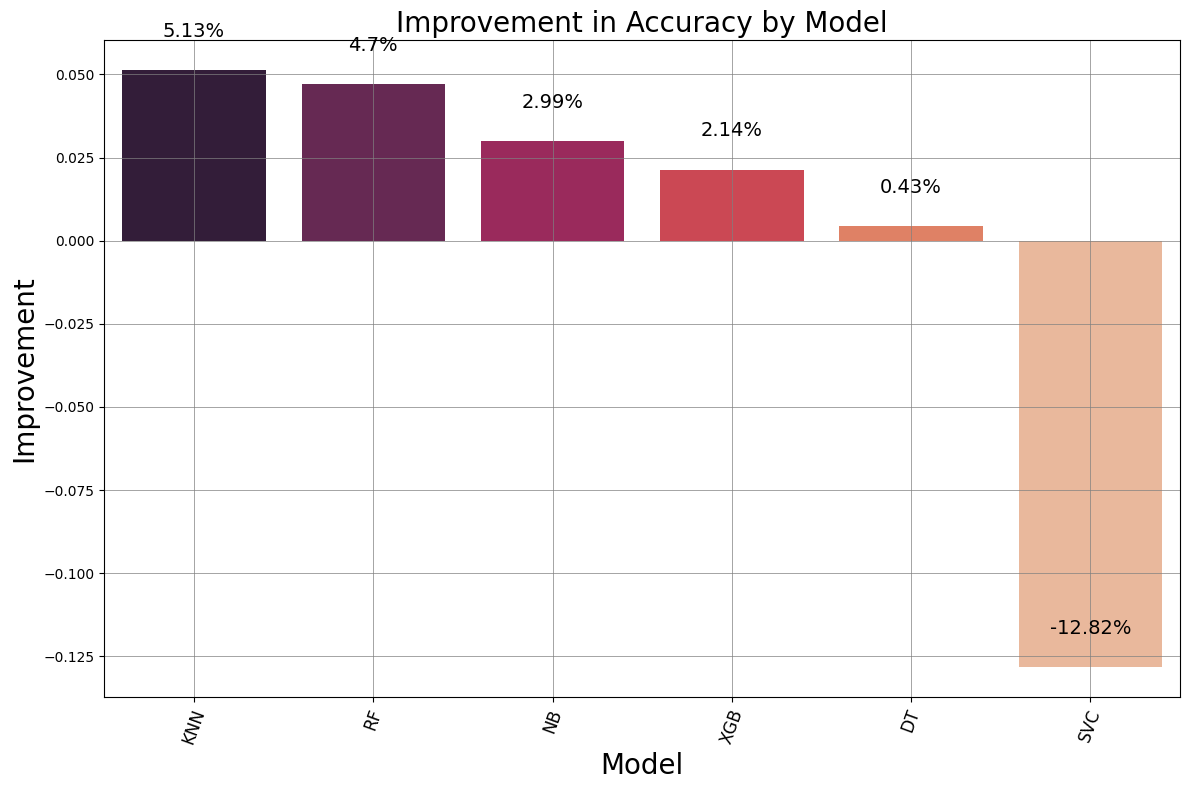

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled, Accuracy_DT_full_labeled, Accuracy_NB_full_labeled, Accuracy_RF_full_labeled, Accuracy_SVC_full_labeled, Accuracy_XGB_full_labeled]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY, MV_DT_ACCURACY, MV_NB_ACCURACY, MV_RF_ACCURACY, MV_SVC_ACCURACY, MV_XGB_ACCURACY]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()


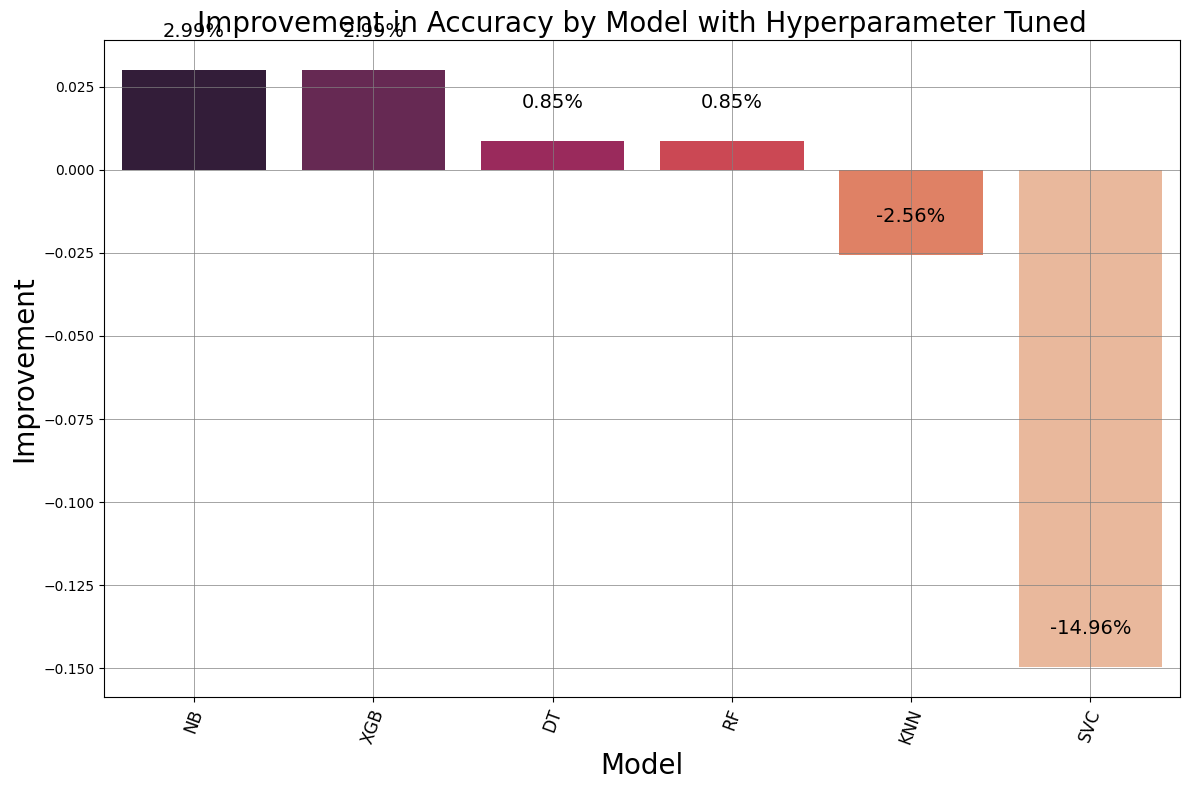

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Previous values
accuracy_list_full_labeled = [Accuracy_KNN_full_labeled_tuned, Accuracy_DT_full_labeled_tuned, Accuracy_NB_full_labeled_tuned, Accuracy_RF_full_labeled_tuned, Accuracy_SVC_full_labeled_tuned, Accuracy_XGB_full_labeled_tuned]
model_list = ['KNN', 'DT', 'NB', 'RF', 'SVC', 'XGB']

df_accuracy_full_labeled = pd.DataFrame({'Model': model_list, 'Previous_Accuracy': accuracy_list_full_labeled})

# New values
new_values = [MV_KNN_ACCURACY, MV_DT_ACCURACY, MV_NB_ACCURACY, MV_RF_ACCURACY, MV_SVC_ACCURACY, MV_XGB_ACCURACY]
df_accuracy_full_labeled['New_Accuracy'] = new_values

# Calculate improvement
df_accuracy_full_labeled['Improvement'] = df_accuracy_full_labeled['New_Accuracy'] - df_accuracy_full_labeled['Previous_Accuracy']

# Sort by improvement
df_accuracy_full_labeled = df_accuracy_full_labeled.sort_values('Improvement', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Improvement", data=df_accuracy_full_labeled, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Improvement", fontsize=20)
plt.title("Improvement in Accuracy by Model with Hyperparameter Tuned", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)

for i in range(len(model_list)):
    plt.text(x=i, y=df_accuracy_full_labeled.loc[i, 'Improvement'] + 0.01,
             s=f"{round(df_accuracy_full_labeled.loc[i, 'Improvement']*100, 2)}%", fontsize=14, color='black', horizontalalignment='center')

plt.tight_layout()
plt.show()
